In [1]:
import qulacs
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion import get_sparse_operator
from openfermion import MolecularData
from openfermionpyscf import run_pyscf

from scipy.optimize import minimize
from pyscf import fci
import numpy as np
import matplotlib.pyplot as plt

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


In [11]:
basis = "sto-3g"
multiplicity = 1
charge = 1
distance  = 1.4632/2 #0.7414
geometry = [["H", [0, 0, 0]],["He", [0, 0, distance]]]
description  = "tmp"
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf = 1,run_fci = 1)
#molecule = run_pyscf(molecule, run_scf=1)
n_qubit = molecule.n_qubits
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)

In [3]:
terms = fermionic_hamiltonian.terms

In [12]:
molecule.get_integrals()

(array([[-2.61128698,  0.17207596],
        [ 0.17207596, -1.3430861 ]]),
 array([[[[ 0.94451065, -0.17207402],
          [-0.17207402,  0.14968592]],
 
         [[-0.17207402,  0.14968592],
          [ 0.67670751,  0.0306259 ]]],
 
 
        [[[-0.17207402,  0.67670751],
          [ 0.14968592,  0.0306259 ]],
 
         [[ 0.14968592,  0.0306259 ],
          [ 0.0306259 ,  0.75469511]]]]))

In [4]:
[
    terms[((0, 1), (0, 1), (0, 0), (0, 0))] * 2,
    terms[((1, 1), (1, 1), (1, 0), (1, 0))] * 2,
    terms[((2, 1), (2, 1), (2, 0), (2, 0))] * 2,
    terms[((3, 1), (3, 1), (3, 0), (3, 0))] * 2,
    terms[((0, 1), (2, 1), (2, 0), (0, 0))] * 2,
]

[0.6744887663568384,
 0.6744887663568384,
 0.6973937674230279,
 0.6973937674230279,
 0.6634680964235684]

In [6]:
molecule.get_molecular_hamiltonian()

() 0.7137539936876182
((0, 1), (0, 0)) -1.2524635735648988
((1, 1), (1, 0)) -1.2524635735648988
((2, 1), (2, 0)) -0.47594871522096416
((3, 1), (3, 0)) -0.47594871522096416
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3372443831784192
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09064440410574806
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3372443831784192
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09064440410574806
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09064440410574806
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3317340482117842
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09064440410574806
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3317340482117842
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3372443831784192
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09064440410574806
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3372443831784192
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09064440410574806
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09064440410574806
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3317340482117842
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09064440410574806
((1, 1), (3, 1), (3, 0), (1, 0)) 0.33173

In [16]:
basis = "sto-3g"
multiplicity = 1
charge = 0
distance  = 0.7414
geometry = [["He", [0,0,0]]]
description  = "tmp"
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf = 1,run_fci = 1)
#molecule = run_pyscf(molecule, run_scf=1)
n_qubit = molecule.n_qubits
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)

In [19]:
fermionic_hamiltonian

-1.931748450137524 [0^ 0] +
0.5278564713675361 [0^ 0^ 0 0] +
0.5278564713675361 [0^ 1^ 1 0] +
0.5278564713675361 [1^ 0^ 0 1] +
-1.931748450137524 [1^ 1] +
0.5278564713675361 [1^ 1^ 1 1]

In [3]:
from qulacs import Observable
from qulacs.observable import create_observable_from_openfermion_text
qulacs_hamiltonian = create_observable_from_openfermion_text(str(jw_hamiltonian))

In [4]:
for operator, coeff in jw_hamiltonian.terms.items():
    
    for i in range(4):
        existing_idx = map(lambda x: x[0], list(jw_hamiltonian.terms.keys())[-1])
        pass
    print(operator, coeff)

() (-0.09886396933545755+0j)
((0, 'Z'),) (0.1711977490343294+0j)
((1, 'Z'),) (0.1711977490343294+0j)
((2, 'Z'),) (-0.22278593040418518+0j)
((3, 'Z'),) (-0.2227859304041852+0j)
((0, 'Z'), (1, 'Z')) (0.1686221915892096+0j)
((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')) (0.045322202052874024+0j)
((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')) (-0.045322202052874024+0j)
((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')) (-0.045322202052874024+0j)
((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')) (0.045322202052874024+0j)
((0, 'Z'), (2, 'Z')) (0.12054482205301814+0j)
((0, 'Z'), (3, 'Z')) (0.16586702410589216+0j)
((1, 'Z'), (2, 'Z')) (0.16586702410589216+0j)
((1, 'Z'), (3, 'Z')) (0.12054482205301814+0j)
((2, 'Z'), (3, 'Z')) (0.17434844185575699+0j)


In [5]:

for operator, coeff in jw_hamiltonian.terms.items():
    
    operator_dict = dict(operator)
    for i in range(4):
        
        if i not in operator_dict:
            operator_dict = operator_dict|{i: 'Id'}
        
    operator_dict = dict(sorted(operator_dict.items()))

    
    print(operator_dict.values(), coeff)

dict_values(['Id', 'Id', 'Id', 'Id']) (-0.09886396933545755+0j)
dict_values(['Z', 'Id', 'Id', 'Id']) (0.1711977490343294+0j)
dict_values(['Id', 'Z', 'Id', 'Id']) (0.1711977490343294+0j)
dict_values(['Id', 'Id', 'Z', 'Id']) (-0.22278593040418518+0j)
dict_values(['Id', 'Id', 'Id', 'Z']) (-0.2227859304041852+0j)
dict_values(['Z', 'Z', 'Id', 'Id']) (0.1686221915892096+0j)
dict_values(['Y', 'X', 'X', 'Y']) (0.045322202052874024+0j)
dict_values(['Y', 'Y', 'X', 'X']) (-0.045322202052874024+0j)
dict_values(['X', 'X', 'Y', 'Y']) (-0.045322202052874024+0j)
dict_values(['X', 'Y', 'Y', 'X']) (0.045322202052874024+0j)
dict_values(['Z', 'Id', 'Z', 'Id']) (0.12054482205301814+0j)
dict_values(['Z', 'Id', 'Id', 'Z']) (0.16586702410589216+0j)
dict_values(['Id', 'Z', 'Z', 'Id']) (0.16586702410589216+0j)
dict_values(['Id', 'Z', 'Id', 'Z']) (0.12054482205301814+0j)
dict_values(['Id', 'Id', 'Z', 'Z']) (0.17434844185575699+0j)


In [6]:
0 in map(lambda x: x[0], list(jw_hamiltonian.terms.keys())[-1])

False

In [7]:
(jw_hamiltonian.terms.keys())

dict_keys([(), ((0, 'Z'),), ((1, 'Z'),), ((2, 'Z'),), ((3, 'Z'),), ((0, 'Z'), (1, 'Z')), ((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')), ((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')), ((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')), ((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')), ((0, 'Z'), (2, 'Z')), ((0, 'Z'), (3, 'Z')), ((1, 'Z'), (2, 'Z')), ((1, 'Z'), (3, 'Z')), ((2, 'Z'), (3, 'Z'))])

In [8]:
list(map(lambda x: dict(x), jw_hamiltonian.terms.keys()))

[{},
 {0: 'Z'},
 {1: 'Z'},
 {2: 'Z'},
 {3: 'Z'},
 {0: 'Z', 1: 'Z'},
 {0: 'Y', 1: 'X', 2: 'X', 3: 'Y'},
 {0: 'Y', 1: 'Y', 2: 'X', 3: 'X'},
 {0: 'X', 1: 'X', 2: 'Y', 3: 'Y'},
 {0: 'X', 1: 'Y', 2: 'Y', 3: 'X'},
 {0: 'Z', 2: 'Z'},
 {0: 'Z', 3: 'Z'},
 {1: 'Z', 2: 'Z'},
 {1: 'Z', 3: 'Z'},
 {2: 'Z', 3: 'Z'}]

In [9]:
for i in range(4):
    print(list(jw_hamiltonian.terms.keys())[6])

((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y'))
((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y'))
((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y'))
((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y'))


In [10]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CZ, RY, RZ, merge, Identity

depth = n_qubit

In [11]:
def he_ansatz_circuit(n_qubit, depth, theta_list):
    """he_ansatz_circuit
    Returns hardware efficient ansatz circuit.

    Args:
        n_qubit (:class:`int`):
            the number of qubit used (equivalent to the number of fermionic modes)
        depth (:class:`int`):
            depth of the circuit.
        theta_list (:class:`numpy.ndarray`):
            rotation angles.
    Returns:
        :class:`qulacs.QuantumCircuit`
    """
    circuit = QuantumCircuit(n_qubit)
    for d in range(depth):
        for i in range(n_qubit):
            circuit.add_gate(merge(RY(i, theta_list[2 * i + 2 * n_qubit * d]), RZ(i, theta_list[2 * i + 1 + 2 * n_qubit * d])))
        for i in range(n_qubit//2):
            circuit.add_gate(CZ(2*i, 2*i+1))
        for i in range(n_qubit//2-1):
            circuit.add_gate(CZ(2*i+1, 2*i+2))
    for i in range(n_qubit):
        circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*depth]), RZ(i, theta_list[2*i+1+2*n_qubit*depth])))

    return circuit

In [12]:
def cost(theta_list):
    state = QuantumState(n_qubit) #Prepare |00000>
    circuit = he_ansatz_circuit(n_qubit, depth, theta_list) #Construct quantum circuit
    circuit.update_quantum_state(state) #Operate quantum circuit on state
    return qulacs_hamiltonian.get_expectation_value(state) #Calculate expectation value of Hamiltonian

In [13]:
tmp_theta = np.random.random(2*n_qubit*(depth+1))*1e-1
tmp_circuit = he_ansatz_circuit(4, 4, tmp_theta)

In [15]:
he_ansatz_circuit(4, 4, tmp_theta)

*** Quantum Circuit Info ***
# of qubit: 4
# of step : 13
# of gate : 32
# of 1 qubit gate: 20
# of 2 qubit gate: 12
Clifford  : no
Gaussian  : no


In [13]:
cost_history = []
init_theta_list = np.random.random(2*n_qubit*(depth+1))*1e-1
cost_history.append(cost(init_theta_list))
method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}
opt = minimize(cost, init_theta_list,
               method=method,
               callback = lambda x: cost_history.append(cost(x)))

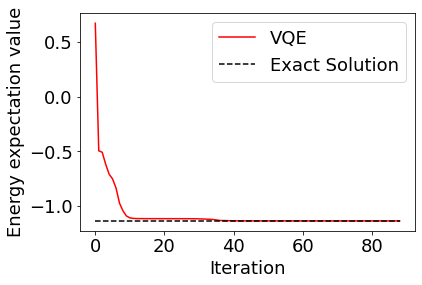

In [14]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.plot(range(len(cost_history)), [molecule.fci_energy]*len(cost_history), linestyle="dashed", color="black", label="Exact Solution")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [29]:
from qulacs import StateVector, QuantumCircuit
from qulacs.gate import RandomUnitary, CNOT , merge
from qulacs.circuit import QuantumCircuitOptimizer
n = 4
gate1 = RandomUnitary([0, 1])
gate2 = RandomUnitary([1, 2])
# Create a merged gate
merged_gate = merge ( gate1 , gate2 )

In [30]:
gate1.get_matrix()

array([[-0.67489437-0.19333626j,  0.01369761+0.51069095j,
        -0.0538364 +0.1910893j ,  0.26903777-0.36653923j],
       [-0.15964767-0.24443965j,  0.28761193+0.17608957j,
         0.58048328-0.61476781j,  0.02603706+0.29232772j],
       [ 0.21988489+0.5083526j , -0.00834225+0.23620171j,
         0.17221235+0.1066575j ,  0.73789387+0.2276997j ],
       [ 0.31749424-0.11969226j,  0.47033546+0.59008701j,
        -0.44913661+0.05412586j, -0.18426636+0.27721047j]])

In [31]:
gate2.get_matrix()

array([[-0.02223484-0.49755107j, -0.16501758+0.69058564j,
         0.28269745+0.32312689j, -0.22078685-0.12138184j],
       [-0.24129921-0.53604091j, -0.29697445-0.33340441j,
         0.38357938-0.31680305j,  0.45470737-0.02874727j],
       [-0.03287279-0.05705016j,  0.45635124-0.10193227j,
        -0.02386618+0.36798023j,  0.37023959-0.70990255j],
       [-0.60184508+0.1995759j , -0.22068798-0.17075866j,
         0.03491663+0.65648735j,  0.09229852+0.28173822j]])

In [33]:
merged_gate.get_matrix()

array([[-0.46853437+0.40805545j,  0.09204938-0.06290886j,
        -0.00580047+0.12386454j, -0.4673656 +0.34629437j,
        -0.11516169-0.41165979j, -0.13063324+0.09765946j,
        -0.10204144-0.00782756j,  0.05921631-0.15652639j],
       [-0.08780584+0.32387623j, -0.40390068+0.08041524j,
        -0.28204843-0.59424983j, -0.01616135-0.19245093j,
        -0.05077399-0.13280048j, -0.00781015-0.04465842j,
         0.4684825 +0.05634322j, -0.01276643+0.05221574j],
       [ 0.16340213+0.18414455j,  0.35167415-0.19793633j,
         0.09983978-0.10634209j, -0.40461817-0.36940769j,
        -0.20552805+0.36447937j,  0.17003944+0.29919355j,
         0.12125948+0.13390077j,  0.32914812-0.14350458j],
       [-0.2267004 +0.07425234j,  0.08205068-0.52871472j,
        -0.31818295-0.02914967j,  0.29756249-0.10538459j,
         0.00224937-0.10673719j,  0.39693611+0.23122405j,
        -0.17476865-0.38218825j,  0.02677936+0.23522906j],
       [ 0.16331807+0.25443231j,  0.0489543 +0.091072j  ,
         0

In [25]:
import numpy as np
from qulacs import QuantumState
from qulacs.gate import X, RY, merge
n = 3
state = QuantumState(n)
state.set_zero_state()
index = 1
x_gate = X(index)
angle = np.pi / 4.0
ry_gate = RY(index, angle)
# Create the new gate by merging gates
# First argument applies first
x_and_ry_gate = merge(x_gate, ry_gate)

In [26]:
x_and_ry_gate

 *** gate info *** 
 * gate name : DenseMatrix
 * target    : 
 1 : commute       
 * control   : 
 * Pauli     : no
 * Clifford  : no
 * Gaussian  : no
 * Parametric: no
 * Diagonal  : no
 * Matrix
 (0.382683,0)   (0.92388,0)
  (0.92388,0) (-0.382683,0)

In [27]:
ry_gate

 *** gate info *** 
 * gate name : Y-rotation
 * target    : 
 1 : commute   Y   
 * control   : 
 * Pauli     : no
 * Clifford  : no
 * Gaussian  : no
 * Parametric: no
 * Diagonal  : no

In [110]:
c1, c2 = random(2)
c1

0.11716126317770537

In [3]:
from scipy.optimize import minimize
from numpy import array, exp, linspace, pi, sqrt, inf

def sto3g_loss(param):
    Zc = 1.24
    c1, c2, c3, a1, a2, a3 = param 
    
    r = linspace(0, 10, 5000)
    l = c1 * exp(- a1 * r**2) + c2 * exp(- a2 * r**2) + c3 * exp(- a3 * r**2) - sqrt(Zc**3/pi) * exp(- Zc * r)
    l = l * r**2
    l = l**2
    l = l.sum()
    return l 

sto3g_coeff = minimize(fun = sto3g_loss, x0 = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6)).x

def sto3g_wavefunc(params, r):
    c1, c2, c3, a1, a2, a3 = params
    return c1* exp(- a1 * r**2) + c2 * exp(- a2 * r**2) + c3 * exp(- a3 * r**2)

In [4]:
import scipy.integrate as integrate


def sto3g_loss_int(param):
    Zc = 1.24
    c1, c2, c3, a1, a2, a3 = param 
    
    integrand = lambda r: r**2 * (c1 * exp(- a1 * r**2) + c2 * exp(- a2 * r**2) + c3 * exp(- a3 * r**2) - sqrt(Zc**3/pi) * exp(- Zc * r))**2
    
    return integrate.quad(integrand, 0, inf)[0]


sto3g_coeff = minimize(fun = sto3g_loss_int, x0 = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6)).x


In [98]:
{sto3g_coeff[i + 3]: (ccc := sto3g_coeff)[i] * (2 * ccc[i + 3]/pi)**-0.75 for i in range(3)}

{0.1688285734197858: 0.44451094166741356,
 0.6238845357911147: 0.535305288708454,
 3.425316432636999: 0.15430396237571295}

In [12]:
from HartreeFock import HartreeFock as hf

xxx = hf.get_sto3g_parameter(1.24)
xxx

array([0.53521099, 0.44460206, 0.15428362, 0.62398276, 0.16886159,
       3.42531141])

In [88]:
integrate.quad(lambda r: 4*pi * r**2 * (2 * (a1 := 3)/pi)**1.5 * exp(- 2 * a1 * r**2), 0, inf)

(1.0, 9.907346967672113e-09)

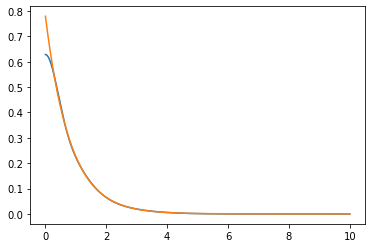

In [99]:
import matplotlib.pyplot as plt

X = linspace(0, 10, 5000)
# plt.plot(X, sto2g_wavefunc(sto2g_coeff, X))
plt.plot(X, sto3g_wavefunc(sto3g_coeff, X))
plt.plot(X, sqrt(1.24**3/pi) * exp(-1.24 * X))
plt.show()

In [6]:
from numpy.random import random

print(minimize(fun = sto3g_loss_int, x0 = random(6)).x)

[0.27681088 0.26781788 0.08350151 3.42619103 0.62412665 0.16889087]


In [107]:
sto3g_coeff

array([0.08344052, 0.26781802, 0.27689346, 0.16882857, 0.62388454,
       3.42531643])

In [66]:
print(minimize(fun = sto3g_loss, x0 = (-0.2, -0.6, -1.3, 2.4, .5, 1.6)).x)

[ 0.46522409  0.52721872 -0.08476278  3.34459354  0.27562611  0.27562572]
